In [1]:
import pandas as pd
import numpy as np
import os
from libraries import hide_toggle
import seaborn as sns
from matplotlib import pyplot as plt

# Table des matières

## 1. ACP

&emsp;   **1.1** [Calcul des composantes principales et choix des axes de projection](#11)  
&emsp;   **1.2** [Taux d'information des composantes principales](#12)    
&emsp;   **1.3** [Corrélation entre nos variables et PC1,PC2](#13)  

## 2. Clustering 

### 2.1 [Clustering hiérarchique des pays](#21)  
&emsp; **2.1.1** [Standardisation des données](#211)     
&emsp; **2.1.2** [Traitement des outliers](#212)    
&emsp; **2.1.3** [Déterminer le seuil de distance optimale](#213)    
&emsp; **2.1.4** [Projection des clusters sur les axes PC1,PC2](#214)    
&emsp; **2.1.5** [Visualisation et labellisation des clusters](#215)  
&emsp; **2.1.6** [Heatmap](#216)   

### 2.2 [KMeans](#22)  

&emsp; **2.2.1** [Standardisation des données](#221)    
&emsp; **2.2.2** [Déterminer le nombre de cluster optimal avec la moyenne silhouette](#222)    
&emsp; **2.2.3** [Projection des clusters sur les axes PC1,PC2](#223)    
&emsp; **2.2.4** [Labellisation et Heatmap des clusters avec leurs caractéristiques](#224)




# 1. ACP

## 1.1 Calcul des composantes principales et choix des axes de projection <a name="11"></a>

In [2]:
training_set = pd.read_csv("../Data set/acp_training_set.csv", index_col=0)

In [3]:

training_set.replace({np.nan : 0.}, inplace=True)

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
# Sépare les variables caractéristiques des labels 
features = training_set.columns[1:]
target = training_set.columns[1]
x = training_set.loc[:, features].values
y = training_set.loc[:, target].values

# On standardise l'échantillon de données (moyenne = 0, variance=1)
data_standardized = StandardScaler().fit_transform(x)

# Enregistre le résultat dans un dataFrame Pandas
data_standardized = pd.DataFrame(data_standardized, columns=features)


data_standardized.fillna(0, inplace=True)

In [6]:
features

Index(['croissance demo', 'Disponibilité intérieure',
       'Exportations - Quantité', 'Importations - Quantité', 'Production',
       'unurished death cause (%)', 'CO2 emission (ton/capita)',
       'GDP_growth (%)', 'Political_Stability', 'gini index'],
      dtype='object')

In [7]:
from sklearn.decomposition import PCA

In [8]:
# projection des individus sur un axe en 2D
nb_components = 2
pca = PCA(n_components=2)
projection_matrix = pca.fit_transform(data_standardized)

#Variance expliquée par composants

pd.DataFrame(np.transpose(pca.explained_variance_ratio_), index=["F_1", "F_2"], columns=["F quality (%)"])

,F quality (%)
F_1,0.307585
F_2,0.240562


<div class ="alert-info">
    
**Note** : 55% de l'information de nos variables initiales est expliquée par nos 2 composants **F1** (30%) et **F2** (24%)
    
</div>

## 1.2 Taux d'information selon le choix des composantes principales <a name="12"></a>

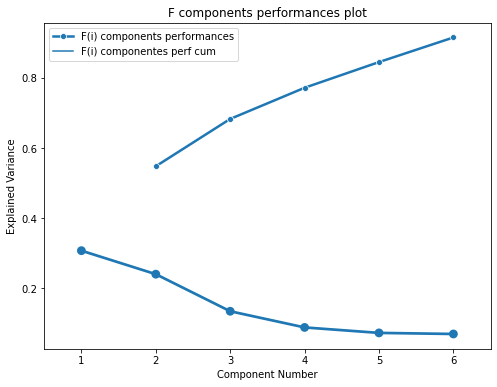

In [9]:
data_quality = []
nb_components = 6

(fig, ax) = plt.subplots(figsize=(8, 6))

# Fit du modele d'ACP avec 6 composantes
for i in range(2, nb_components+1):
    pca = PCA(n_components=i)
    data_standardized = pd.DataFrame(data_standardized, columns=features)
    pca.fit_transform(data_standardized)
    data_quality.append(pca.explained_variance_ratio_.sum())

data = pd.DataFrame(data_quality, index=[i for i in range(1,6)], columns=["F total quality (%)"])
sns.lineplot(data=data, palette="tab10", linewidth=2.5, marker='o')


ind = np.arange(0, nb_components)
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('F components performances plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind+1)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
ax.legend(["F(i) components performances","F(i) componentes perf cum"])
plt.show()
hide_toggle()

 **Note** : La pertinence des données projetées sur les nouveaux axes données par la variance expliqué :
 
 1. Les composantes **F1** et **F2** conservent **55%** des informations données par nos variables initiales
 2. Les composantes **F1**, **F2** et **F3** (axe 3D) conservent **70%** de l'information

## 1.3 Corrélation entre nos variables initiales et les composantes principales <a name="13"></a>

In [10]:
#Décomposition linéaire des composantes principales

componentes_statistics = pd.DataFrame(pca.components_, columns=features, index=["F_"+str(i) for i in range(1,nb_components+1)]).join(pd.DataFrame(pca.explained_variance_ratio_, index=["F_"+str(i) for i in range(1,nb_components+1)], columns=["F quality (%)"]))
componentes_statistics

,croissance demo,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,unurished death cause (%),CO2 emission (ton/capita),GDP_growth (%),Political_Stability,gini index,F quality (%)
F_1,-0.256592,0.459323,0.428643,0.265071,0.463752,-0.340312,0.268916,-0.124893,0.211186,-0.076119,0.307585
F_2,0.233936,0.336720,0.290441,-0.067732,0.358018,0.394632,-0.370578,0.162823,-0.403609,0.363728,0.240562
F_3,0.553079,0.074766,-0.024147,0.348311,0.007253,0.088678,0.390090,0.525756,-0.065471,-0.354708,0.134897
F_4,0.098552,0.057083,-0.229802,0.726215,-0.102574,0.229676,0.005182,-0.547982,-0.124871,0.166299,0.088811
F_5,-0.335351,0.080355,-0.126423,0.103443,0.013347,-0.204373,-0.250046,0.035107,-0.671589,-0.545588,0.073217
F_6,-0.355644,0.019337,-0.260469,0.332567,-0.090348,-0.270557,-0.025083,0.564488,-0.039803,0.540809,0.070155


**Note** :  
* Disponibilité intérieure, Production et les décès liés à la famine sont les variables dominantes dans le calcul de **F1**
* Emission de CO2, la stabilité politique, le taux de mortalité lié à la sous nutrition et l'indice de gini sont les variables dominantes dans le calcul de **F2**

**Interprétation des nouvelles features** : (55% de l'information retranscrite par F1,F2)

* Le nouvel axe des abscisses **F1** représente les pays producteurs qui préviligient les échanges commerciaux 
* L'axe des ordonné régi par **F2** représentes les pays luttant contre la famine avec un gouvernement peu stable et de forte inégalité des richesses

In [11]:
#pca = PCA(n_components=6)
nb_components=2
pca = PCA(n_components=nb_components)
reduced = pca.fit_transform(data_standardized)


for i in range(0, nb_components):
    training_set['PC' + str(i + 1)] = reduced[:, i]

/Users/amarcade/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


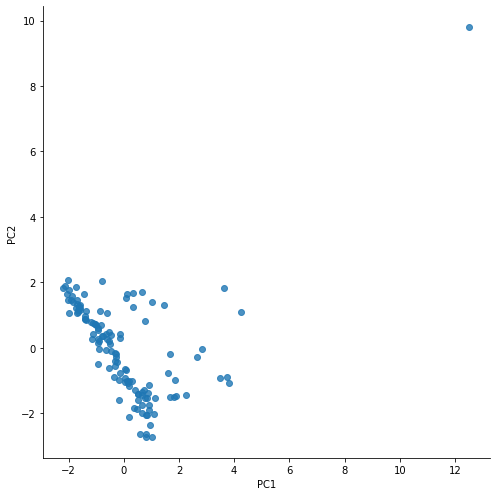

In [12]:
g = sns.lmplot(x='PC1',
               y='PC2',
               data=training_set,
               fit_reg=False,
               scatter=True,
               height=7)

plt.show()

In [13]:
from mlxtend.plotting import plot_pca_correlation_graph

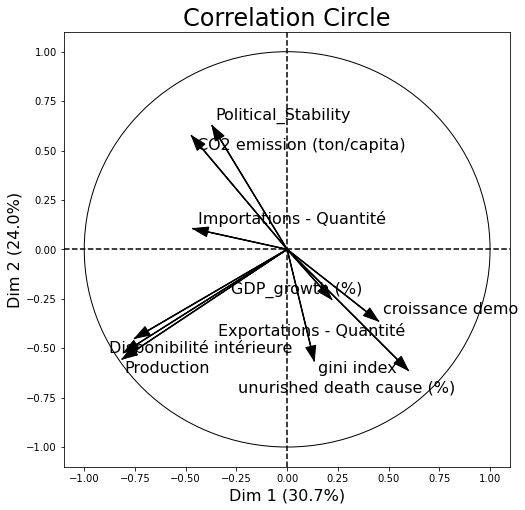

In [14]:
fig, correlation_matrix = plot_pca_correlation_graph(
    data_standardized, 
    features,
    dimensions=(1, 2),
    figure_axis_size=8
)
hide_toggle()

## Interprétation cercle de corrélation des composantes principales

**Coin inférieur droit :** Les pays sous développés qui n'ont pas les quantités suffisantes avec peu/pas d'échange à l'international et qui souffrent d'inégalité sociales.
    
**Milieu - haut  :** Les pays qui n'ont pas de suffisamment de volaille mais qui ne souffrent pas d'inégalité sociale et ont un gouvernement stable

In [15]:
correlation_matrix

,Dim 1,Dim 2
croissance demo,0.450013,-0.362836
Disponibilité intérieure,-0.805565,-0.522256
Exportations - Quantité,-0.751758,-0.450475
Importations - Quantité,-0.464883,0.105053
Production,-0.813333,-0.555289
unurished death cause (%),0.596842,-0.612077
CO2 emission (ton/capita),-0.471628,0.574769
GDP_growth (%),0.219038,-0.252540
Political_Stability,-0.370380,0.626001
gini index,0.133497,-0.564145


# 2. Clustering sur les axes de projection

## 2.1 Classification hiérarchique des pays <a name="21"></a>

### 2.1.1 Standardisation des données <a name="211"></a>

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [17]:
# reduced : matrice de projection des points sur PC1 et PC2
data_standardized =  StandardScaler().fit_transform(reduced)
Z = linkage(data_standardized, method = 'complete')

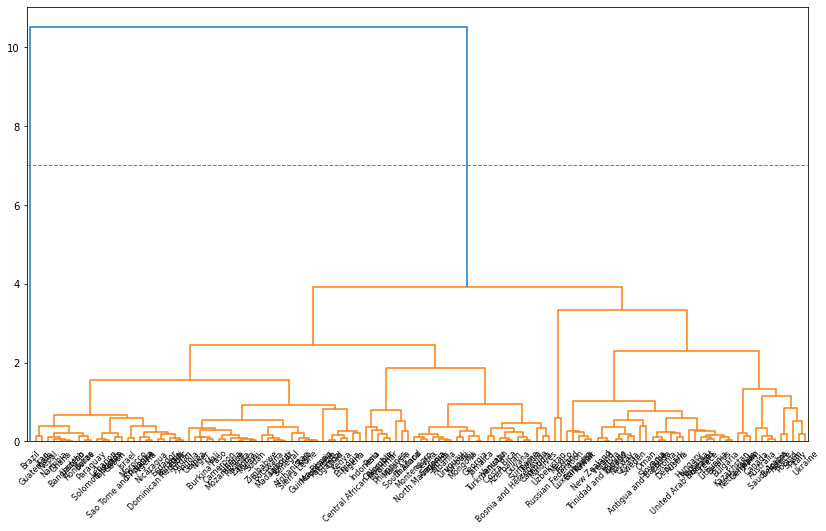

In [18]:
plt.subplots(figsize=(14,8))
leaf_labels = training_set["Country Name"].values
dendrogram(Z, leaf_rotation=45, leaf_font_size=8, color_threshold=7, labels=leaf_labels)
plt.axhline(y=7, c='grey', lw=1, linestyle='dashed')
plt.show()

### 2.1.2 Traitement des outliers <a name="212"></a>

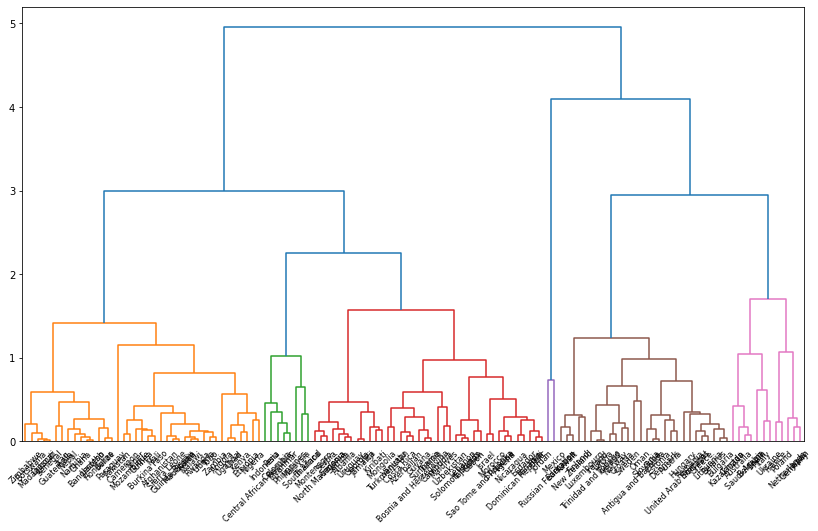

In [19]:
# Suppression des outliers : Le Brésil
outlier_index = training_set.loc[training_set["Country Name"] == "Brazil"].index.values
training_set.drop(index=outlier_index, inplace=True)

# Standardiser les data
PC_features = ["PC1","PC2"]
x = training_set.loc[:, PC_features].values

data_standardized = StandardScaler().fit_transform(x)
nb_components=2
pca = PCA(n_components=nb_components)
reduced = pca.fit_transform(data_standardized)

Z = linkage(data_standardized, method="complete")

# Nouveau dendrogramme

plt.subplots(figsize=(14,8))

leaf_labels = training_set["Country Name"].values
dendrogram(Z, leaf_rotation=45, leaf_font_size=8, color_threshold=1.75, labels=leaf_labels)
plt.axhline(y=7, c='grey', lw=1, linestyle='dashed')
plt.show()

In [20]:
cluster_assignation = fcluster(Z, t=1.5, criterion="distance")
training_set["hierarchical_clustering_labels"] = cluster_assignation

### 2.1.3 Déterminer le seuil de distance optimale <a name="213"></a>

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [22]:
PC_features = ["PC1","PC2"]
X = training_set[PC_features] 

In [23]:
# Coefficient de silhouette
# CS = 0 : Le point proche de la frontière de décision avec le cluster le plus proche
# CS proche de 1 : Le point est dans le bon cluster
silhouette_score(X,cluster_assignation)

0.46233551050695815

In [24]:
distance_threshold_range = np.linspace(1,3,20)
Z = linkage(data_standardized, 'complete')
s_score = []
nb_clusters=[]
# Calcul du score silhouette pour chacune des valeurs de t
for threshold in distance_threshold_range:
    labels = fcluster(Z,t=threshold,criterion="distance")
    nb_cluster = len(np.unique(labels))
    silhouet_score = silhouette_score(X,labels)
    s_score.append(silhouet_score)
    nb_clusters.append(nb_cluster)


# plotting du résultat
array = np.transpose(np.array([distance_threshold_range,nb_clusters,s_score]))
data = pd.DataFrame(array, columns=["threshold_distance","nb_clusters","s_score"])


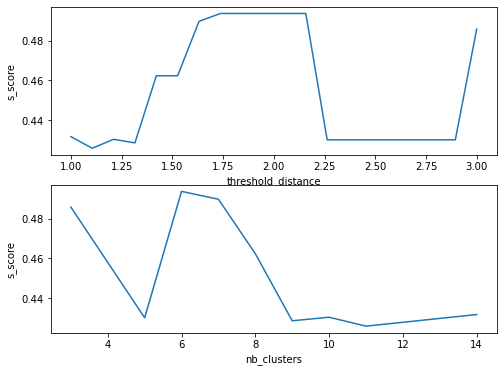

In [25]:
fig, ax = plt.subplots(2,1, figsize=(8,6))
sns.lineplot(data=data, x="threshold_distance", y="s_score", ax=ax[0])
sns.lineplot(data=data, x="nb_clusters", y="s_score", ax=ax[1])
plt.show()
hide_toggle()

<div class ="alert-info">
    
 Le choix de la distance <b>t</b> utilisée pour catégoriser nos observations doit <b>maximiser</b> le silhouette score.
Pour la classification hierarchique, nous allons utiliser les hyperparamètres optimisés suivant : 
    
</div>
<br></br>

<div class ="alert-warning">

**Hyperparamètres optimisés :**
* Profondeur de classification : **t~2**
* Nombre de cluster optimal : **nb_cluster = 6**

</div>

### 2.1.4 Projection des clusters sur les axes PC1, PC2 <a name="214"></a>

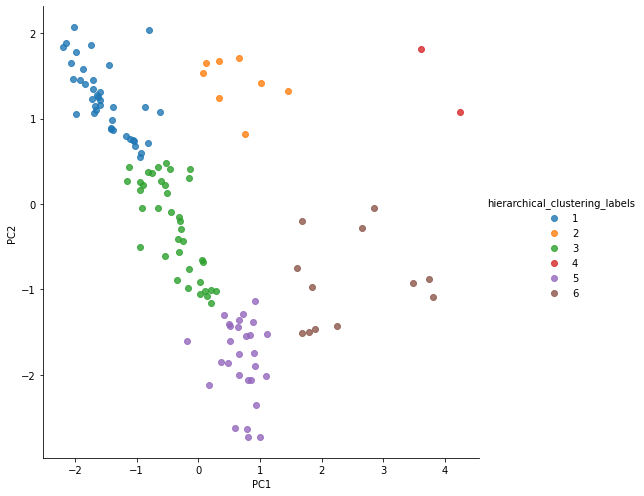

In [26]:
# Le nombre de cluster est de 6 avec un seuil t = 5
cluster_assignation = fcluster(Z, t=2, criterion="distance")
training_set["hierarchical_clustering_labels"] = cluster_assignation

# Visualisation des clusters sur les axes de projection PC1,PC2

g = sns.lmplot(x='PC1',
               y='PC2',
               data=training_set,
               hue="hierarchical_clustering_labels",
               fit_reg=False,
               scatter=True,
               height=7)

plt.show()
hide_toggle()

### 2.1.5 Visualisation et Labellisation des clusters <a name="215"></a>

In [27]:
features = np.append(features,"hierarchical_clustering_labels")

In [28]:
# Tableau statistiques qui montre la moyenne des caractéristiques par cluster
training_set[features].groupby(by=["hierarchical_clustering_labels"]).mean()

,croissance demo,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,unurished death cause (%),CO2 emission (ton/capita),GDP_growth (%),Political_Stability,gini index
hierarchical_clustering_labels,,,,,,,,,,
1,0.023150,122.128205,0.743590,33.794872,90.358974,51.665357,0.546213,4.045515,-0.770228,43.027177
2,0.011638,1662.000000,113.500000,121.875000,1666.375000,24.574765,2.727973,4.614261,-0.820139,45.594710
3,0.012251,122.342105,1.657895,18.868421,107.657895,14.984856,2.660223,3.622118,-0.148777,38.173941
4,0.006316,4387.500000,62.000000,599.000000,3846.500000,8.141762,7.625352,2.262438,-0.760278,43.050588
5,0.007267,155.928571,42.250000,82.785714,135.857143,5.906273,9.006388,3.192517,0.785992,24.749663
6,0.005864,1260.416667,428.250000,396.750000,1394.666667,6.208694,9.962685,2.741624,0.529954,29.082471


In [29]:
# composition des pays dans chaque cluster
training_set[training_set["hierarchical_clustering_labels"] == 6 ]["Country Name"]

4           Germany
7      Saudi Arabia
9         Australia
14          Belgium
24           Canada
31            Spain
35           France
53            Italy
55            Japan
93      Netherlands
95           Poland
119         Ukraine
Name: Country Name, dtype: object

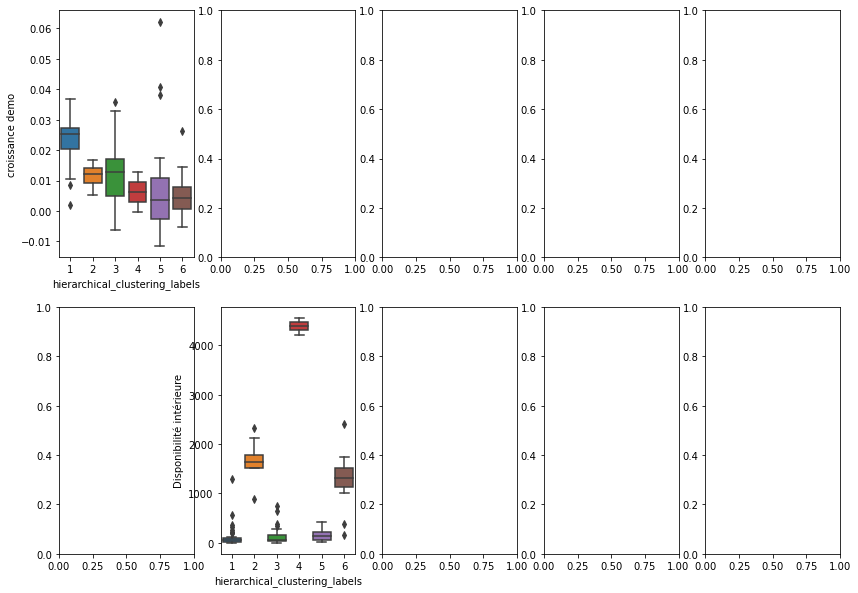

In [30]:
# Analyse de la distribution des caractéristiques pour chaque cluster
# Erreur d'affichage

fig,ax = plt.subplots(2,5,figsize=(14,10))
i=1
j=1
for feature in features[:-1] :
    
    if i % 3 != 0 :
        if j % 6 != 0:
            sns.boxplot(x="hierarchical_clustering_labels", y=feature,
                        data=training_set, ax=ax[i-1][j-1])
            j+=1
        i+=1
plt.show()

### 2.1.6 Heatmap des clusters avec leur caractéristiques <a name="216"></a>

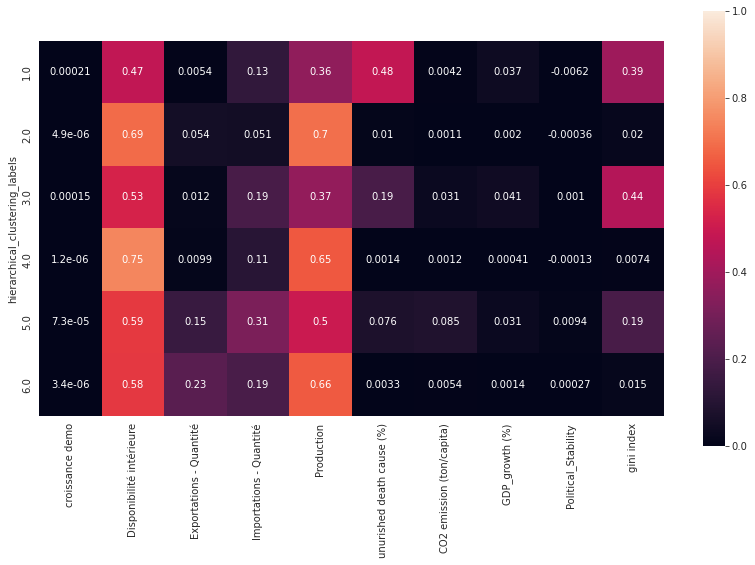

In [31]:
from sklearn import preprocessing

# Formater les attributs sur une échelle de 0 à 1
X = training_set[features[:-1]]
normalized_data = preprocessing.normalize(X)

# Concaténation des labelles des clusters
labelled_data = np.concatenate((normalized_data, np.array([training_set[features[-1]]]).T), axis=1)
labelled_data_df = pd.DataFrame(labelled_data,columns=features)

# Groupement par cluster
normalized_grouped_data = labelled_data_df.groupby(by=["hierarchical_clustering_labels"]).mean()
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.heatmap(normalized_grouped_data, square=True, annot=True, vmin=0, vmax=1)
    plt.savefig('heatmap_cluster_hierarchique.png')
hide_toggle()

<div class ="alert-info">
    <b>Note</b> : Les coefficients affichés dans la heatmap représentent le poids de chacun des attributs/caractéristiques à l'intérieur de chaque clusters (1 à 6). Les valeurs sont comprises entre 0 et 1.
</div>

## Interprétation

* Les **clusters 1 et 3** contiennent les pays avec les plus grandes inégalités sociales comme le montre l'indice de gini et le taux de mortalité

* Le **cluster 2 et 4** met l'accent sur les pays producteurs de poulet qui ne sont donc pas dans le besoin urgent d'acquérir davantage de volaille.

* Les **clusters 5 et 6** représentent les pays peu importateurs mais dans le besoin avec un gouvernement stable

## Recommandations

* Cibler les pays en déficit alimentaire pour subvenir aux besoins des habitants et diminuer le taux de mortalité lié à la famine **-->** Améliorer les conditions sociales (1,3)

* Cibler les pays pour renforcer les échanges commerciaux de volaille **-->** Créer du bénéfice avec les pays importateurs (5,6)

In [32]:
training_set[training_set["hierarchical_clustering_labels"].isin([1,3])]["Country Name"]

0          Afghanistan
2              Albania
3              Algeria
5               Angola
8              Armenia
            ...       
122             Zambia
123           Zimbabwe
125            Ecuador
126           Ethiopia
127    Solomon Islands
Name: Country Name, Length: 77, dtype: object

In [33]:
training_set[training_set["hierarchical_clustering_labels"].isin([5,6])]["Country Name"]

4                   Germany
6       Antigua and Barbuda
7              Saudi Arabia
9                 Australia
10                  Austria
13                 Barbados
14                  Belgium
19                 Bulgaria
21                  Belarus
24                   Canada
27                  Croatia
28                     Cuba
29                  Denmark
31                    Spain
32                  Estonia
34                  Finland
35                   France
39                   Greece
47                  Hungary
50                  Ireland
51                  Iceland
53                    Italy
55                    Japan
57               Kazakhstan
60                   Kuwait
62                   Latvia
65                Lithuania
66               Luxembourg
84                   Norway
85              New Zealand
87                     Oman
93              Netherlands
95                   Poland
96                 Portugal
98                  Romania
106                S

## 2.2 Kmeans <a name="22"></a>

### 2.2.1 Standardisation des données <a name="221"></a>

In [34]:
from sklearn.cluster import KMeans

In [35]:
# Standardiser les données
data_standardized = StandardScaler().fit_transform(reduced)

# Entrainer le model avec les données standardisées
kmean_model = KMeans(n_clusters=6,random_state=0).fit(data_standardized)

# Labelliser les clusters 
training_set["KMeans_clustering_labels"] = kmean_model.labels_

### 2.2.2 Déterminer le nombre de cluster optimal avec la moyenne silhouette <a name="222"></a>

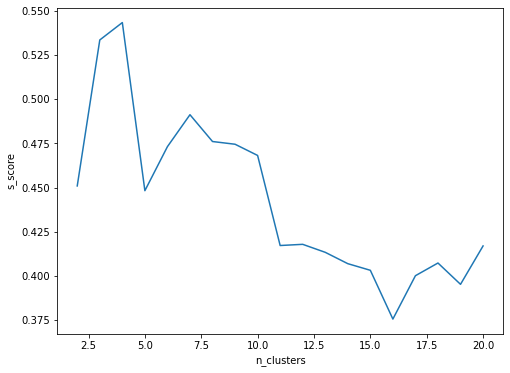

In [36]:
# Utilisation de la matrice en composantes principales issue de l'ACP 

silhouette_average = []
nb_cluster_range = [*range(2,21)]
for n_clusters in nb_cluster_range:
    kmean_model = KMeans(n_clusters=n_clusters, random_state=0).fit(data_standardized)
    cluster_assignation = kmean_model.labels_
    s_score = silhouette_score(data_standardized,cluster_assignation)
    silhouette_average.append(s_score)

# Mise en forme des datas en dataframe
data = np.array([nb_cluster_range,silhouette_average]).T
df_ = pd.DataFrame(data=data, columns=["n_clusters","s_score"])
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.lineplot(data = df_,x="n_clusters", y="s_score",ax=ax)
plt.show()
hide_toggle()

In [37]:
# nombre optimal de cluster selon le score de la moyenne silhouette
df_[df_["s_score"] == max(df_["s_score"])]["n_clusters"]

2    4.0
Name: n_clusters, dtype: float64

### 2.2.3 Projection des points sur les axes PC1,PC2 <a name="223"></a>

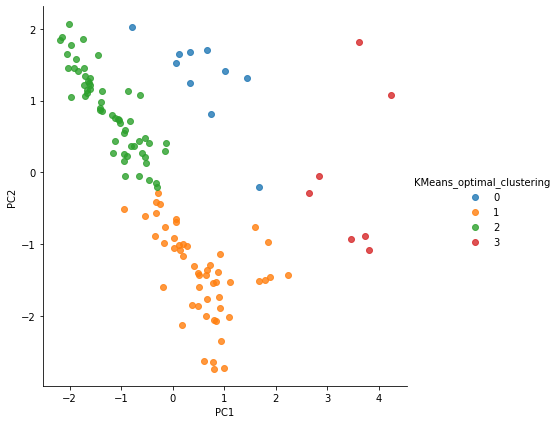

In [38]:
# Entrainer le model avec les paramètres optimaux
n_opt_cluster=4
kmean_model = KMeans(n_clusters=n_opt_cluster, random_state=0).fit(data_standardized)
cluster_assignation = kmean_model.labels_

# Constitution du df contenant les points à projeter

training_set["KMeans_optimal_clustering"] = cluster_assignation

# Projection des points sur le plan PC1,PC2

g = sns.lmplot(x='PC1',
               y='PC2',
               data=training_set,
               hue="KMeans_optimal_clustering",
               fit_reg=False,
               scatter=True,
               height=6)

plt.show()
hide_toggle()

### 2.2.4 Labellisation et Heatmap des clusters <a name="224"></a>

In [39]:
# Tableau statistiques des moyennes de chacun des attributs pour chaque clusters
training_set.groupby(by=["KMeans_optimal_clustering"]).mean()

,croissance demo,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,unurished death cause (%),CO2 emission (ton/capita),GDP_growth (%),Political_Stability,gini index,PC1,PC2,hierarchical_clustering_labels,KMeans_clustering_labels
KMeans_optimal_clustering,,,,,,,,,,,,,,
0,0.012142,1607.500000,112.400000,118.200000,1612.700000,24.081922,2.886318,4.515779,-0.874444,42.992132,0.562989,1.318398,2.300000,4.600000
1,0.007065,224.192308,48.807692,79.230769,207.000000,7.538192,7.221541,3.174446,0.523169,28.391142,0.543938,-1.396593,4.423077,1.576923
2,0.021346,124.327586,1.034483,29.431034,97.672414,40.583360,1.182891,3.965113,-0.627538,42.610423,-1.220423,0.861176,1.689655,1.810345
3,0.003015,2290.000000,532.000000,611.142857,2374.714286,7.213565,8.315053,2.705571,0.361429,34.834794,3.479072,-0.044833,5.428571,1.857143


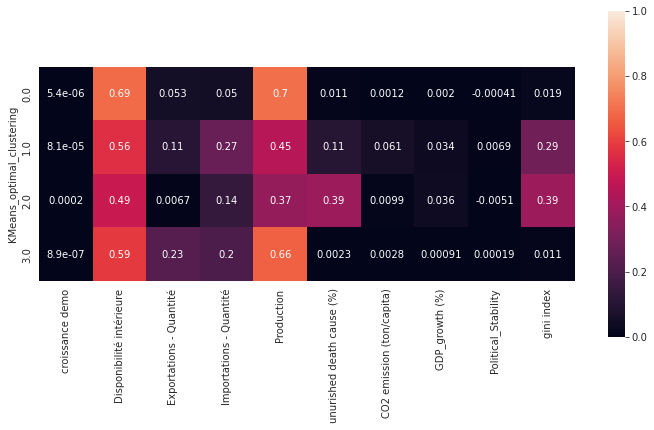

In [40]:
features[-1] = "KMeans_optimal_clustering" 
# Concaténation des labels des clusters

labelled_data = np.concatenate((normalized_data, np.array([training_set["KMeans_optimal_clustering"]]).T), axis=1)
labelled_data_df = pd.DataFrame(labelled_data,columns=features)

# Groupement des clusters par la moyenne (comprise entre 0 et 1)

normalized_grouped_data = labelled_data_df.groupby(by=["KMeans_optimal_clustering"]).mean()

# Création de la heatmap


normalized_grouped_data = labelled_data_df.groupby(by=["KMeans_optimal_clustering"]).mean()
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 6))
    ax = sns.heatmap(normalized_grouped_data, square=True, annot=True, vmin=0, vmax=1)
    plt.savefig('heatmap_kmeans_clustering.png')
hide_toggle()

## Recommantations

* Cibler les pays en sous développement pour améliorer les conditions sociales (Inégalité des richesses et famine) **-->** cluster **1 et 2**

* Cibler les pays pour dynamiser le marché économique de la volaille comme le montre le **cluster 3**

In [41]:
# Pays à cibler pour subvenir aux besoins sociaux
training_set[training_set["KMeans_optimal_clustering"].isin([1,2])]["Country Name"]

0               Afghanistan
2                   Albania
3                   Algeria
5                    Angola
6       Antigua and Barbuda
               ...         
123                Zimbabwe
124    United Arab Emirates
125                 Ecuador
126                Ethiopia
127         Solomon Islands
Name: Country Name, Length: 110, dtype: object

In [42]:
# Pays à cibler pour dynamiser le marché économique et signer des accords commerciaux
training_set[training_set["KMeans_optimal_clustering"].isin([3])]["Country Name"]

4                Germany
35                France
36    Russian Federation
55                 Japan
75                Mexico
93           Netherlands
95                Poland
Name: Country Name, dtype: object